## Explore the semi-classical limit of PINEM
It compares PINEM with on a coherent state with $\overline{n}=25$ with the semi-classical result

In [12]:
%matplotlib widget

from src.wigner_function import wigner_coherent, wigner_classical
from src.plot_function import plot_wigner_electron, plot_wigner_photon
from src.wigner_methods import wigner_spectral_convolve, wigner_propagate
from qutip import basis, wigner, displace
import numpy as np
from math import sqrt, pi

### Simulations input

In [27]:
ene_photon=1.55 # Photon energy in eV
g0=0.5 # Electron-photon coupling constant
prop_mm=2.0 # propagation distance after interaction in mm
ZLP_width=0.7 # Energy standard deviation in eV

nbar=25 # Average number of photon in the cavity
theta=pi # Phase of the coherent state
alpha=sqrt(nbar)*np.exp(1j*theta) # Define the coherent state parameter

### Compute the initial photon Wigner function

In [28]:
# Dimension of the Hilbert space - needs to be >nbar
N_space=200 
# Define the displacement operator
d = displace(N_space, alpha) 
# Displace vacuum to generate the coherent state
psi=d*basis(N_space,0) 
# Compute the density matrix
rho=psi * psi.dag() 
# Sampling if the phase-space
xvec = np.linspace(-10,10,200) 
# Use Qtip to compute the photon Wigner function
W_photon = wigner(rho, xvec, xvec)

### Plot the initial photon Wigner function

/Users/lourenco/Documents/Académique/Recherche/02 - CR/Git_Codes/pyQIELS_v2/notebooks/src/plot_function.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GridSpec(2, 2, height_ratios=[1, 2.0], width_ratios=[2.0, 1])

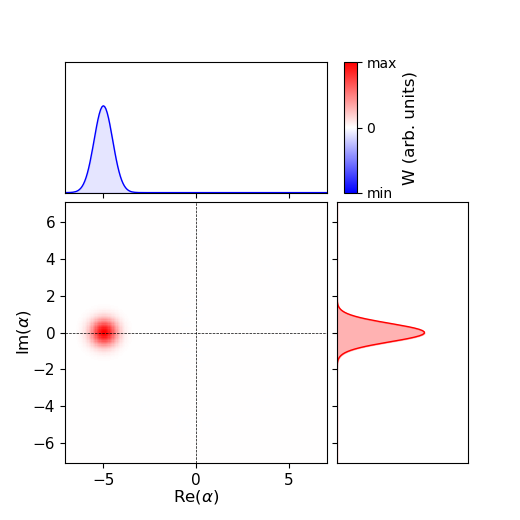

In [29]:
plot_wigner_photon(W_photon, xvec, xvec)

### Compute the electron Wigner function

In [30]:
# Compute the exact electron Wigner function
Wigner_coherent, sidebands_axis, z_axis  = wigner_coherent(ene_photon,g0,alpha,method="numerical")
# Convolve with ZLP
Wigner_convolved, p_axis = wigner_spectral_convolve(Wigner_coherent, ene_photon, ZLP_width)
# Propagation after interaction
W_coherent_propagated=wigner_propagate(Wigner_convolved, p_axis, ene_photon, prop_mm)

loop over Fock states[████████████████████████████████████████] 50/50 Est wait 00:00.00



### Plot the electron Wigner function

/Users/lourenco/Documents/Académique/Recherche/02 - CR/Git_Codes/pyQIELS_v2/notebooks/src/plot_function.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[3, 1])

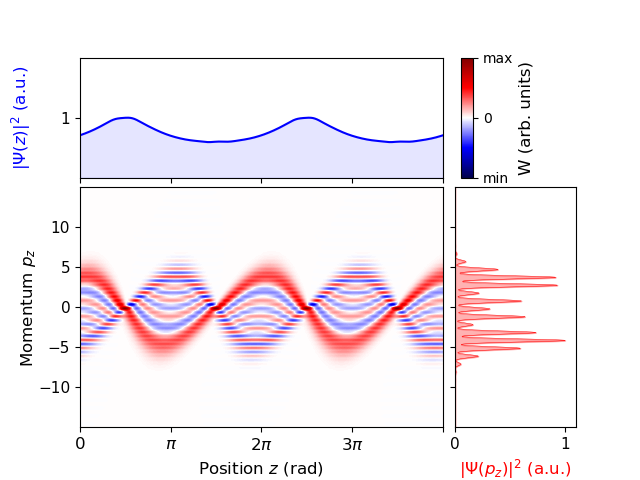

In [31]:
plot_wigner_electron(W_coherent_propagated, p_axis, z_axis, ene_photon)

### Comparison with the classical electron Wigner function

In [32]:
# Correspondance between the electron-photon and electron-light coupling constants
g=sqrt(nbar)*g0

In [33]:
# Compute the exact electron Wigner function
Wigner_classical, sidebands_axis, z_axis  = wigner_classical(ene_photon,g)
# Convolve with ZLP
Wigner_classical_convolved, p_axis = wigner_spectral_convolve(Wigner_classical, ene_photon, ZLP_width)
# Propagation after interaction
W_classical_propagated=wigner_propagate(Wigner_classical_convolved, p_axis, ene_photon, prop_mm)

/Users/lourenco/Documents/Académique/Recherche/02 - CR/Git_Codes/pyQIELS_v2/notebooks/src/plot_function.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[3, 1])

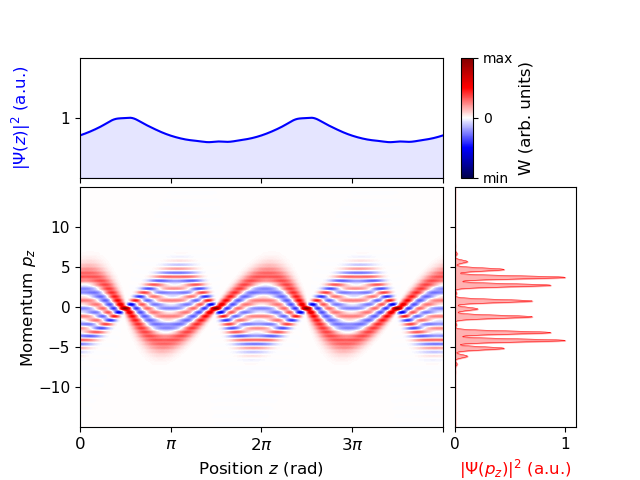

In [34]:
plot_wigner_electron(W_classical_propagated, p_axis, z_axis, ene_photon)